In [1]:
from lblcrn.bulk_crn import *
from lblcrn.spec.crn import *
from lblcrn.experiments.xps_io import *
from lblcrn.experiments.solution_system import *
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
sm = SpeciesManager()

y1 = sm.sp('y1', Orbital('1s', 535.0))
x2 = sm.sp('x2', Orbital('1s', 532.2))
x3 = sm.sp('x3', Orbital('1s', 530.9))
x4 = sm.sp('x4', Orbital('1s', 530.0))
x53 = sm.sp('x53', Orbital('1s', 531.6))
x54 = sm.sp('x54', Orbital('1s', 531.6))
x6 = sm.sp('x6', Orbital('1s', 533.2))
x7 = sm.sp('x7', Orbital('1s', 535.0))

multipliers = [0.1, 0.5, 1, 5, 10]

highp_hight = XPSInitializationData(
                'High P, High T',
                0,0,
                experimental_file='../data/ag_100e-3_300.txt',
                constants=[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.116930, 0.152889, 3.270343, 0.329519, 1.111032]
            )

lowp_rt = XPSInitializationData(
                'Low P,  RT',0,
                '../data/ag_1e-5_25.txt',
                constants=[0.000039, 0.000017, 6.220646, 0.1607555, 0.299507, 0.167130, 0.794455, 0.000006, 0.300480, 0.127713, 0.000013, 0.394500, 0.000960, 76.964514]
            )

init_data = [highp_hight]

In [3]:
def rsys_generator(scaled):
    rsys = RxnSystem(
        Rxn(x4 + y1, x54, scaled[0]), # 0
        Rxn(x3 + y1, x53, scaled[1]), # 1
        Rxn(x54, x3 + x3, scaled[2]), # 2
        Rxn(x3 + x3, x54, scaled[3]), # 3
        Rxn(x53, x2 + x3, scaled[4]), # 4
        Rxn(x54, x2 + x4, scaled[5]), # 5
        Rxn(x2, y1, scaled[6]), # 6
        Rxn(y1, x2, scaled[7]), # 7
        Rxn(x53, y1 + x3, scaled[8]), # 8
        Rxn(x54, x4 + y1, scaled[9]), # 9
        Rxn(x53 + y1, x6, scaled[10]), # 10
        Rxn(x6, x53 + y1, scaled[11]), # 11
        Rxn(x4 + x4, x7, scaled[12]), # 12
        Rxn(x7, x4 + x4, scaled[13]), # 13
        Conc(y1, 1.0),
        Conc(x4, 0.25),
        sm
    )
    return rsys

In [10]:
runner = XPSSystemRunner(rsys_generator, 100, init_data, multipliers)

In [11]:
runner.simulate(0)

[-4.283841*x2 + 0.628183*x53 + 0.501633*x54 + 0.116718*y1, -0.988332*x3**2 - 0.169813*x3*y1 + 3.572604*x53 + 4.047222*x54, -0.659038*x4**2 - 0.0236191*x4*y1 + 2.618563*x54 + 2.222064*x7, 0.169813*x3*y1 - 0.152889*x53*y1 - 3.572604*x53 + 3.270343*x6, 0.494166*x3**2 + 0.0236191*x4*y1 - 4.642174*x54, 0.152889*x53*y1 - 3.270343*x6, 0.329519*x4**2 - 1.111032*x7, 4.283841*x2 - 0.169813*x3*y1 - 0.0236191*x4*y1 - 0.152889*x53*y1 + 2.944421*x53 + 2.11693*x54 + 3.270343*x6 - 0.116718*y1]
Solved for (0, 0)
[0.023619100000000004, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


[-4.283841*x2 + 0.628183*x53 + 0.501633*x54 + 0.116718*y1, -0.988332*x3**2 - 0.169813*x3*y1 + 3.572604*x53 + 4.047222*x54, -0.659038*x4**2 - 0.1180955*x4*y1 + 2.618563*x54 + 2.222064*x7, 0.169813*x3*y1 - 0.152889*x53*y1 - 3.572604*x53 + 3.270343*x6, 0.494166*x3**2 + 0.1180955*x4*y1 - 4.642174*x54, 0.152889*x53*y1 - 3.270343*x6, 0.329519*x4**2 

Solved for (3, 4)
[0.236191, 0.169813, 2.023611, 4.94166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


[-4.283841*x2 + 0.0628183*x53 + 0.501633*x54 + 0.116718*y1, -0.988332*x3**2 - 0.169813*x3*y1 + 3.0072393*x53 + 4.047222*x54, -0.659038*x4**2 - 0.236191*x4*y1 + 2.618563*x54 + 2.222064*x7, 0.169813*x3*y1 - 0.152889*x53*y1 - 3.0072393*x53 + 3.270343*x6, 0.494166*x3**2 + 0.236191*x4*y1 - 4.642174*x54, 0.152889*x53*y1 - 3.270343*x6, 0.329519*x4**2 - 1.111032*x7, 4.283841*x2 - 0.169813*x3*y1 - 0.236191*x4*y1 - 0.152889*x53*y1 + 2.944421*x53 + 2.11693*x54 + 3.270343*x6 - 0.116718*y1]
Solved for (4, 0)
[0.236191, 0.169813, 2.023611, 0.494166, 0.06281830000000001, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


[-4.283841*x2 + 0.3140915*x53 + 0.501633*x54 + 0.116718*y1, -0.988332*x3**2 - 0.169813*x3*y1 + 3.2585125*x53 + 4.047222*x54, -0.659038*x4**2 - 0.236191*x4*y1 + 2.618563*x54 + 2.222064*x7,

Solved for (8, 0)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 0.29444210000000004, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


[-4.283841*x2 + 0.628183*x53 + 0.501633*x54 + 0.116718*y1, -0.988332*x3**2 - 0.169813*x3*y1 + 2.1003935*x53 + 4.047222*x54, -0.659038*x4**2 - 0.236191*x4*y1 + 2.618563*x54 + 2.222064*x7, 0.169813*x3*y1 - 0.152889*x53*y1 - 2.1003935*x53 + 3.270343*x6, 0.494166*x3**2 + 0.236191*x4*y1 - 4.642174*x54, 0.152889*x53*y1 - 3.270343*x6, 0.329519*x4**2 - 1.111032*x7, 4.283841*x2 - 0.169813*x3*y1 - 0.236191*x4*y1 - 0.152889*x53*y1 + 1.4722105*x53 + 2.11693*x54 + 3.270343*x6 - 0.116718*y1]
Solved for (8, 1)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 1.4722105, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (8, 2)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 1.4722105, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


[-4.283841*x2 + 0.628183

Solved for (12, 1)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.1647595, 1.111032]


Solved for (12, 2)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.1647595, 1.111032]


[-4.283841*x2 + 0.628183*x53 + 0.501633*x54 + 0.116718*y1, -0.988332*x3**2 - 0.169813*x3*y1 + 3.572604*x53 + 4.047222*x54, -3.29519*x4**2 - 0.236191*x4*y1 + 2.618563*x54 + 2.222064*x7, 0.169813*x3*y1 - 0.152889*x53*y1 - 3.572604*x53 + 3.270343*x6, 0.494166*x3**2 + 0.236191*x4*y1 - 4.642174*x54, 0.152889*x53*y1 - 3.270343*x6, 1.647595*x4**2 - 1.111032*x7, 4.283841*x2 - 0.169813*x3*y1 - 0.236191*x4*y1 - 0.152889*x53*y1 + 2.944421*x53 + 2.11693*x54 + 3.270343*x6 - 0.116718*y1]
Solved for (12, 3)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 1.647595, 1.111032]


[-4.283841*x2 + 0.628183*x53 + 0.501

In [12]:
sys = runner.system()

scaling factor: 1 	max index: 0


In [13]:
sys.ignore = [y1]

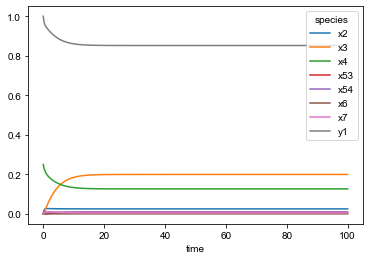

In [14]:
ts = sys.time_series_at(0,2)
ts.plot()

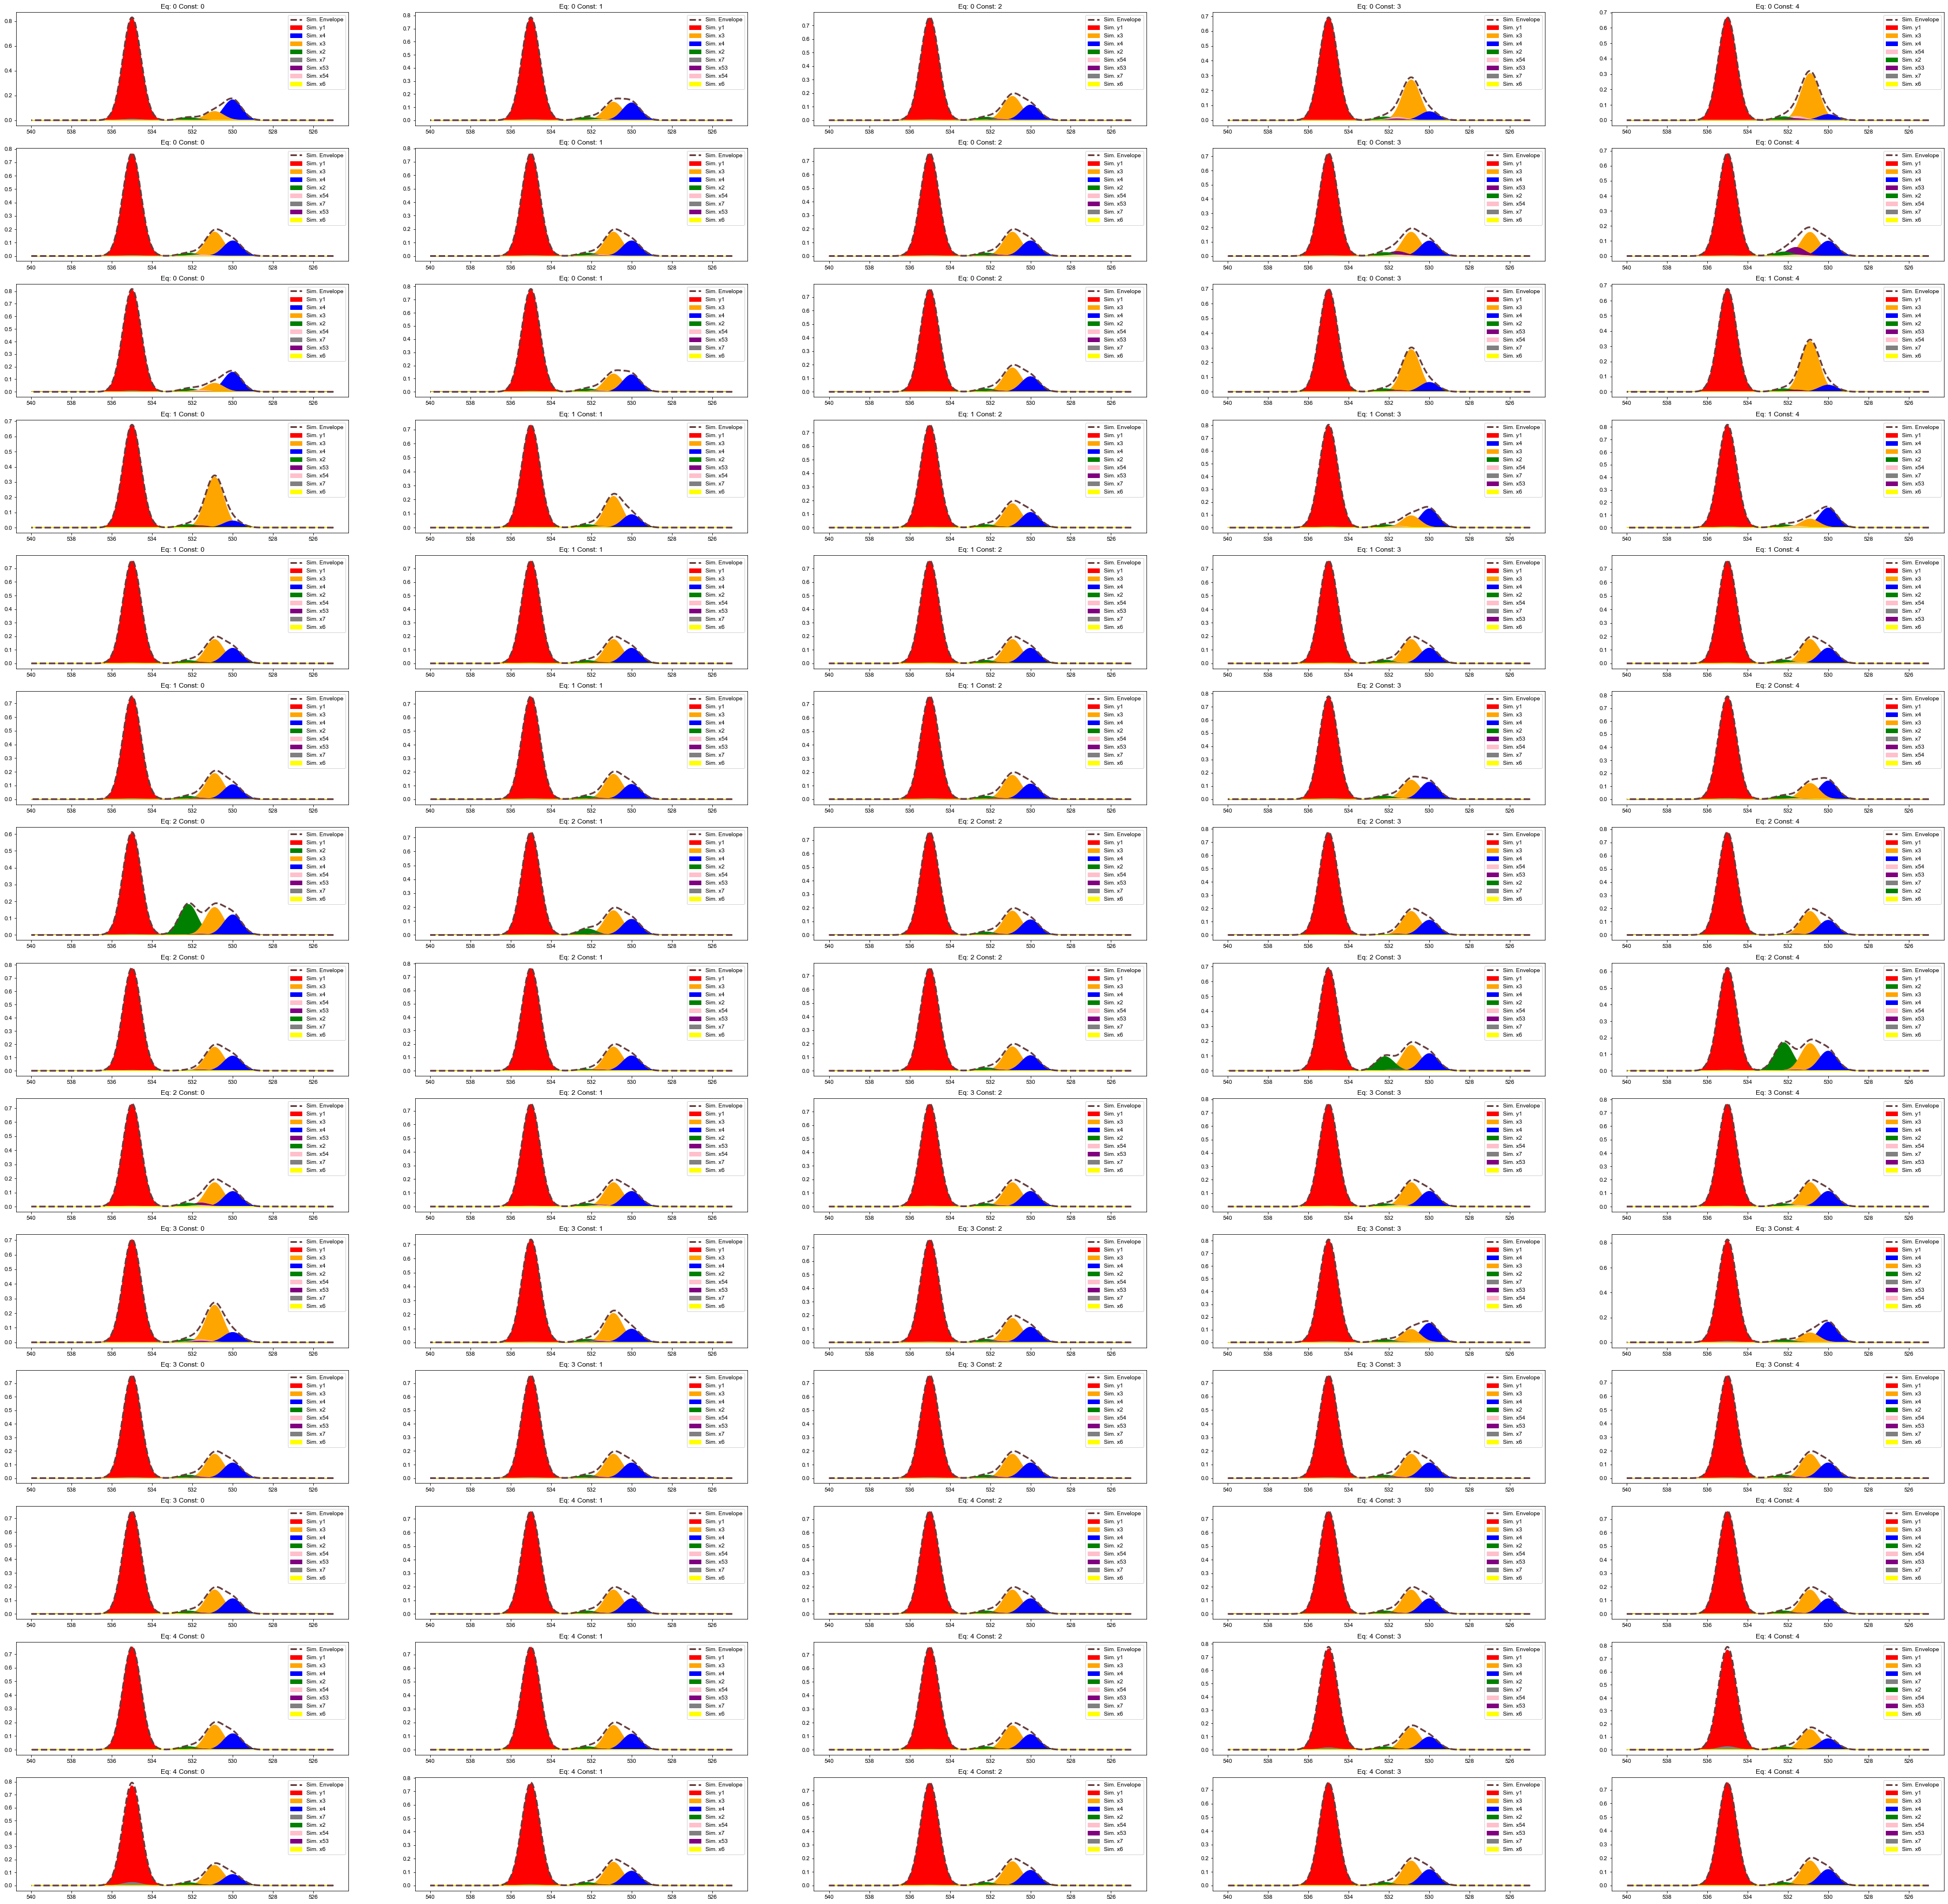

In [8]:
sys.plot(0)